In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Read the data

In [2]:
# Reading CSV file
train=pd.read_csv("C:\\Users\\Dell\\Downloads\\emnist_byclass_train.csv").astype('float32')
train=np.array(train)
test=pd.read_csv("C:\\Users\\Dell\\Downloads\\emnist_byclass_test.csv").astype('float32')
test=np.array(test)


#for i in range(33737):
  #train=np.append(train,[test[0]],axis=0)
  #test=np.delete(test,(0),axis=0)


# There are in total 814255 images each of size 28 X 28
# Each row in the CSV file contains one image flattern in a vector of size 784
print("train_data: ")
print()
print(train)

print()
print()

print("test_data: ")
print()
print(test)

train_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 6.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [ 5.  0.  0. ...  0.  0.  0.]
 [11.  0.  0. ...  0.  0.  0.]
 [22.  0.  0. ...  0.  0.  0.]]


test_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [28.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 5.  0.  0. ...  0.  0.  0.]]


# Shuffling the data

In [3]:
train=shuffle(train)
test=shuffle(test)

# Split the data into image and their labels

In [6]:
# As it is seen that '0' column contains labels (0,61).
# Split data into images and their labels
train_x=train[:,1:785]
train_y=train[:,0]
test_x=test[:,1:785]
test_y=test[:,0]



print("train_x: ", train_x.shape)
print()
print(train_x)
print()

print("test_x",test_x.shape)
print()
print(test_x)
print()

print("train_y",train_y.shape)
print()
print(train_y)
print()

print("test_y",test_y.shape)
print()
print(test_y)
print()

train_x:  (697931, 784)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test_x (116322, 784)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

train_y (697931,)

[11. 47. 40. ...  5. 43.  5.]

test_y (116322,)

[41. 53. 24. ... 47. 28. 22.]



# Data pre processing


> *Reverse and rotate the data*







In [7]:
train_x = train_x.reshape(-1, 28, 28).transpose(0, 2, 1)
test_x = test_x.reshape(-1, 28, 28).transpose(0, 2, 1)

In [10]:
print(train_x.shape)
print(test_x.shape)

(697931, 28, 28)
(116322, 28, 28)


# Plotting the number of alphabets and digits in the dataset

train_y_integer:  [11 47 40 ...  5 43  5]
test_y_integer:  [41 53 24 ... 47 28 22]


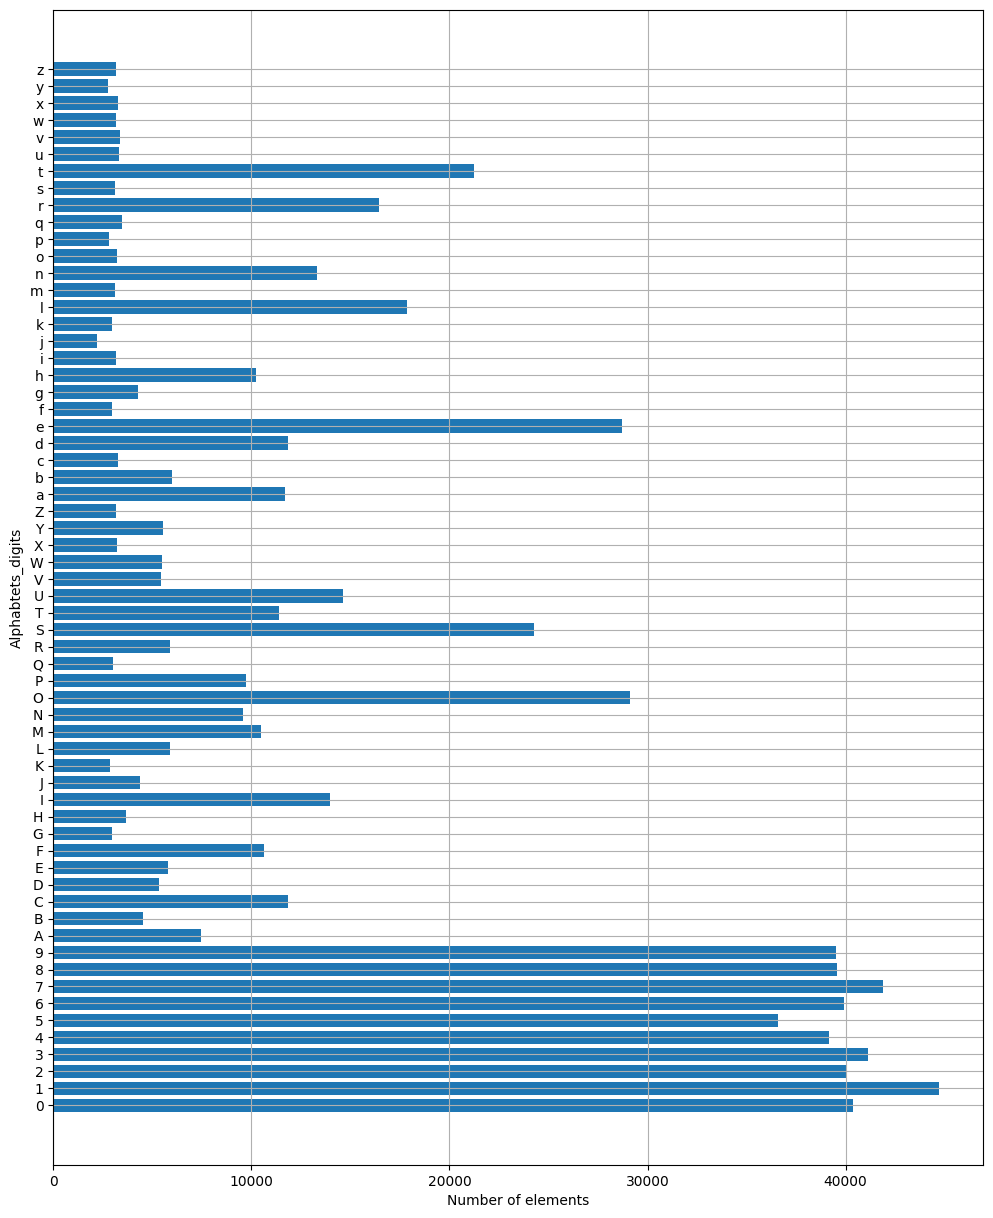

In [8]:
# We create a dictionary word_dict to map the integer values with the characters.
word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',
             16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N', 24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',
             31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',
             46:'k',47:'l',48:'m',49:'n', 50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',
             61:'z'}


# All the labels are present in the form of floating point values, that we convert to integer values.
# y_integer is a vector of 'integer values of y'
train_y_integer = train_y.astype(int)
test_y_integer = test_y.astype(int)

print("train_y_integer: ", train_y_integer)
print("test_y_integer: ", test_y_integer)


# 'count' is vector of size 26 which keeps count of how many times is that character present in dataset
count = np.zeros(62, dtype='int')
for i in train_y_integer:
    count[i] +=1
for i in test_y_integer:
    count[i] +=1

alphabets_digits = ['0','1','2','3','4','5','6','7','8','9',
                    'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                    'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


# Plotting the number of each alphabet in the dataset
fig, ax = plt.subplots(1,1, figsize=(12,15))
ax.barh(alphabets_digits, count)   #  'barh' is used to make a horizontal bar plot
plt.xlabel("Number of elements")
plt.ylabel("Alphabtets_digits")
plt.grid()
plt.show()

# Reshaping the Train and Test data

In [9]:
# Reshaping the training & test DATA so that it can be put in the model
from tensorflow.keras.utils import to_categorical

# First one-hot encode the labels
final_train_y = to_categorical(train_y, num_classes=62)
print("New shape of train labels: ", final_train_y.shape)

final_test_y = to_categorical(test_y, num_classes=62)
print("New shape of test labels: ", final_test_y.shape)

print()
train_x = train_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_x = test_x.reshape(-1, 28, 28, 1).astype('float32') / 255.0


# Optional: If you want the one-hot vectors as integers (0s and 1s instead of float 0. and 1.)
final_train_y = final_train_y.astype(int)
final_test_y = final_test_y.astype(int)

print("Final train labels (int type):", final_train_y.shape)
print("Final test labels (int type):", final_test_y.shape)


New shape of train labels:  (697931, 62)
New shape of test labels:  (116322, 62)

Final train labels (int type): (697931, 62)
Final test labels (int type): (116322, 62)


# CNN Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
# CNN model designed for training the model over the training dataset
model = Sequential()

model.add(Input(shape=(28,28,1)))
# filters: filter consist of kernels
# activation: activation function to use
#             activation = relu (rectified linear activation function) 
#                          that will output the input directly if it is positive, otherwise, it will output zero.
# padding: one of "valid" or "same"  
#          valid: means no padding. 
#          same: results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width as the input.
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))


model.add(Flatten())


# Fully connected layers
model.add(Dense(256,activation ="relu"))
model.add(Dense(512,activation ="relu"))

# Dropout layer
model.add(Dropout(0.5))

# Softmax function for classification
model.add(Dense(62,activation ="softmax"))

# Compiling & Fitting the model

In [13]:
# Compiling and fitting the model
model.compile(optimizer = Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_x = train_x.reshape(-1,28,28,1).astype('float32')/255.0
test_x = test_x.reshape(-1,28,28,1).astype('float32')/255.0

history = model.fit(
    train_x, final_train_y,
    epochs=5,                # Increased for better accuracy
    batch_size=256,           # Faster training
    validation_data=(test_x, final_test_y),
    verbose=1                 # Show progress bar
)

Epoch 1/5
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 342s 125ms/step - accuracy: 0.1373 - loss: 3.4352 - val_accuracy: 0.5235 - val_loss: 1.8812
Epoch 2/5
 478/2727 ━━━━━━━━━━━━━━━━━━━━ 3:35 96ms/step - accuracy: 0.4820 - loss: 1.9974

KeyboardInterrupt: 

# Model summary

In [11]:
model.summary()
model.save(r'HCR_English.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,075,518 (4.10 MB)

 Trainable params: 1,075,518 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

# Model accuracy and Model loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │        31,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,075,518 (4.10 MB)

 Trainable params: 1,075,518 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'history' is not defined

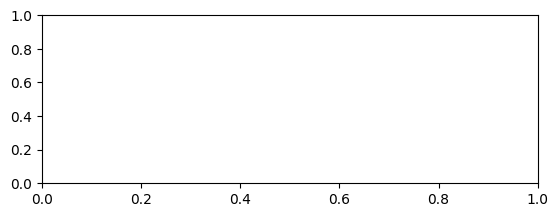

In [19]:
# Plot accuracy vs epoch
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model(r'HCR_English.keras')

# Verify the model
model.summary()


fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Plot loss vs epoch
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# No. of Correct and Incorrect predictions

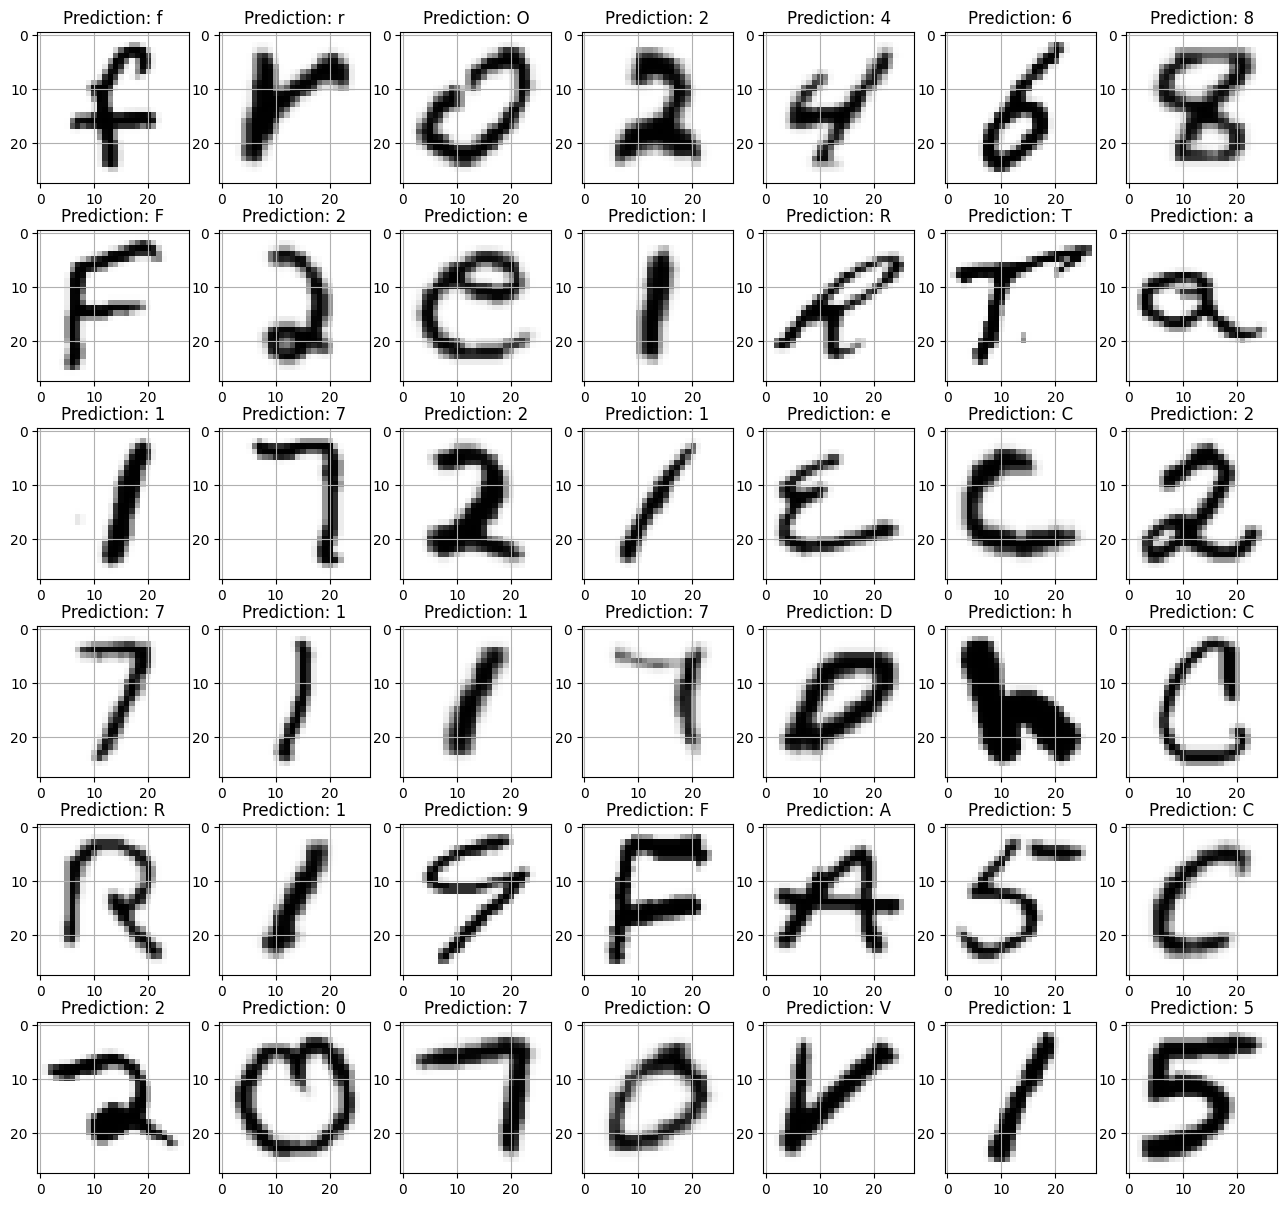

In [20]:
# Prediction on test dataset
fig, axes = plt.subplots(6,7, figsize=(16,15))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_x[i], (28,28))
    #img=np.transpose(img)
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(final_test_y[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [21]:
# Predict the class probabilities
y_pred_probs = model.predict(test_x)

# Get the class with the highest probability
predicted_classes = np.argmax(y_pred_probs, axis=1)

# Find indices of correctly predicted test images
correct = np.nonzero(predicted_classes == test_y_integer)[0]

# Find indices of incorrectly predicted test images
incorrect = np.nonzero(predicted_classes != test_y_integer)[0]

print()
print("Correctly classified images: ", len(correct))
print("Incorrectly classified images: ", len(incorrect))


3636/3636 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step

Correctly classified images:  493
Incorrectly classified images:  115829


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


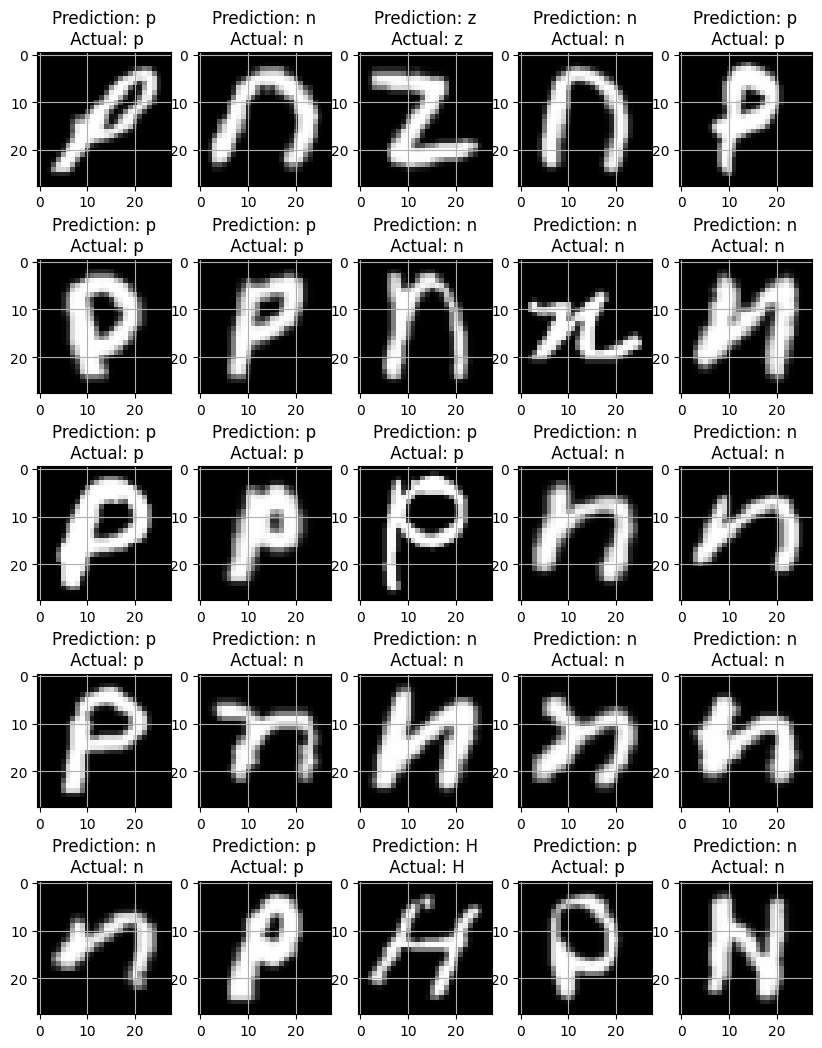

In [22]:
# Printing few correctly predicting test images
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_x[correct[i]], (28,28))
    ax.imshow(img, cmap='gray')
    
    img = np.reshape(test_x[correct[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred)]
    actual=word_dict[test_y_integer[correct[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


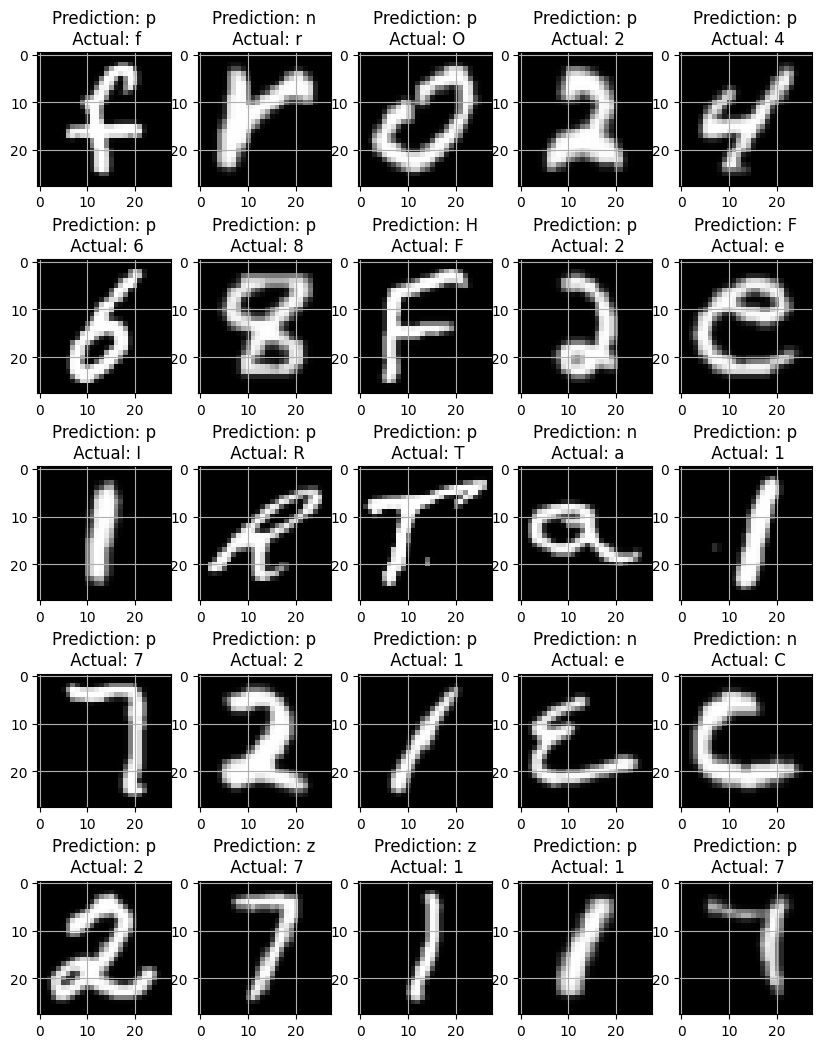

In [23]:
# Printing few incorrectly predicting test images
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_x[incorrect[i]], (28,28))
    ax.imshow(img, cmap='gray')
    
    img = np.reshape(test_x[incorrect[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred)]
    actual=word_dict[test_y_integer[incorrect[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()